## Visualizing Progress for Subjective Metrics 

### by Chi Zhang

### Goal

Visualize progress for the four metrics(mood, stress, rumination, and sleep) to mental health providers and their patients

Questions to consider:

Given the information you have and any light research you’d like to do on the topic, what
insights can you draw? 

What assumptions have you made about the data? What are 2-3 additional pieces of information that would be important to collect? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
df = pd.read_csv("./subj_measures.csv")

In [6]:
print(df.shape)
print(df.dtypes)

(7460, 4)
date        object
user_id      int64
type        object
value      float64
dtype: object


In [11]:
# convert data type of date column
df['date'] = pd.to_datetime(df['date'])

In [28]:
# check for and drop duplicates 
print('No. of duplicates: ', sum(df.duplicated()))
df.drop_duplicates(inplace = True)

No. of duplicates:  1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7459
Data columns (total 4 columns):
date       7459 non-null datetime64[ns, UTC]
user_id    7459 non-null int64
type       7459 non-null object
value      7459 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 291.4+ KB


Dataset now has the correct data types with no missing values and duplicates.

In [40]:
print(df.shape)
print(df['user_id'].nunique())
print(df['date'].min(), df['date'].max())
print(df['type'].value_counts())

(7459, 4)
100
2018-08-18 03:26:17.246000+00:00 2019-07-24 17:11:37.971000+00:00
sleep                 3414
mood                  3397
anticipatoryStress     332
ruminationStress       316
Name: type, dtype: int64


### Strucutre of the Dataset

There are 4 attributes, and 7459 complete rows in the dataset with 100 unique users included. The date attribute ranges from 2018/8/18 to 2019/7/24. The type attribute include sleep, mood, santicipatory stress and rumination stress as expected

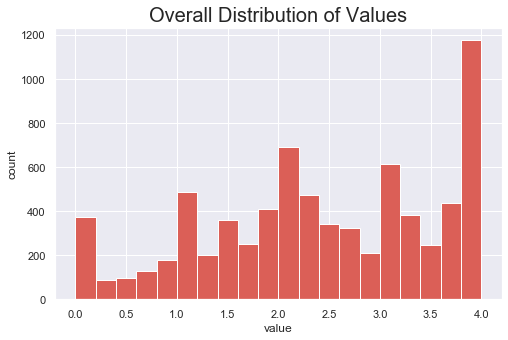

In [85]:
## first plot a histogram on the overall distrubution of values

binsize = 0.2
bins = np.arange(0, df['value'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'value', bins = bins)
plt.xlabel('value')
plt.ylabel('count')
plt.title('Overall Distribution of Values', fontsize=20)
plt.show()

In [48]:
sleep = df[df['type'] == 'sleep']
mood = df[df['type'] == 'mood']
anticipatoryStress = df[df['type'] == 'anticipatoryStress']
ruminationStress = df[df['type'] == 'ruminationStress']

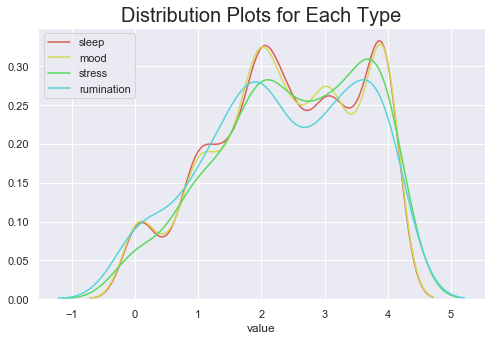

In [87]:
sb.set_palette("hls")
plt.figure(figsize=[8, 5])
sb.distplot(sleep['value'], hist = False, label = 'sleep')
sb.distplot(mood['value'], hist = False, label = 'mood')
sb.distplot(anticipatoryStress['value'], hist = False, label = 'stress')
sb.distplot(ruminationStress['value'], hist = False, label = 'rumination')
plt.title('Distribution Plots for Each Type', fontsize=20);

### Insights:

The distribution plots above provide an overview of how patients respond to the four types of exercises. In specific, all four types follow the similar distribution with two peaks clustered around 2 and 4. Rumination stress is more spread out, and it's showing that patients have worse scores for rumination stree than anticipatory stress. 

### Next, I will visualize the progress of patients' mental health.

Given that the dataset covers one year from 8/2018 to 7/2019, I decide to group records by months for providers to track their parients' overall performances

In [72]:
df['month'] = [i.month for i in df['date']]

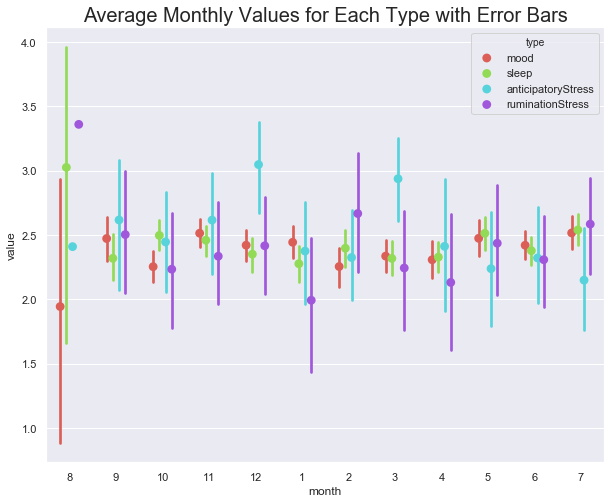

In [88]:
plt.figure(figsize=[10, 8])
o = [8,9,10,11,12,1,2,3,4,5,6,7]
sb.pointplot(data = df, x = 'month', y = 'value', hue = 'type',
               palette = 'hls', linestyles = '', dodge = 0.4, order = o)
plt.title('Average Monthly Values for Each Type with Error Bars', fontsize=20);

### Insights
From the plot above, we can observe that mean values of mood and sleep slightly flactuate over the one year time frame. They tend to deacrease towards the end of 2018, and then increase starting from 1/2019 to 7/2019. Rumination shares similar patterns with an exception that the mean values drop from 2/2019 to 4/2019. Anticipatory stress behaves differently from other ones, it increases at the end of 2018, drops to the bottom at the beginning of 2019, then starts decreasing again from 3/2019. Overall, January is the worst month for patients' mental health. 

### Now if the provider wants to take a closer look at the progress of a particular patient. 

The visualizations below are showing progress for each type on an individual patient level. 

In [99]:
patient_2012 = df[df['user_id'] == 2012]

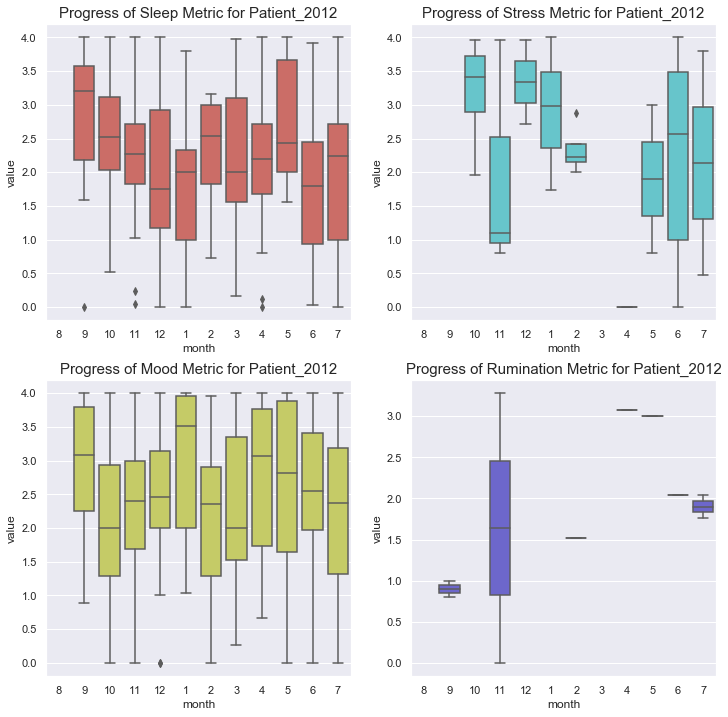

In [173]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = [12,12])
sb.boxplot(x="month", y="value", data=df_2012[df_2012['type'] == 'sleep'], color = sb.color_palette("hls")[0], order = o, ax = ax[0,0])
ax[0,0].set_title('Progress of Sleep Metric for Patient_2012', fontsize = 15)
sb.boxplot(x="month", y="value", data=df_2012[df_2012['type'] == 'mood'], color = sb.color_palette("hls")[1], order = o, ax = ax[1,0])
ax[1,0].set_title('Progress of Mood Metric for Patient_2012', fontsize = 15)
sb.boxplot(x="month", y="value", data=df_2012[df_2012['type'] == 'anticipatoryStress'], color = sb.color_palette("hls")[3], order = o, ax = ax[0,1])
ax[0,1].set_title('Progress of Stress Metric for Patient_2012', fontsize = 15)
sb.boxplot(x="month", y="value", data=df_2012[df_2012['type'] == 'ruminationStress'], color = sb.color_palette("hls")[4], order = o, ax = ax[1,1])
ax[1,1].set_title('Progress of Rumination Metric for Patient_2012', fontsize = 15);

### Assumptions made on the data
1, The 100 patients are randomly selected and not interacting with each other 

2, Patients are honest about their feelings and ratings

3, Patients respond to the notifications randomly, which means they do not only respond they they feel extremely sad or extremely happy. 


###  Additional  information to be added

1, Active time spent on social events/social media

2, Information related to eating habits such as calories intake

3, Scores of simple concentration/learning tests